# Credit Risk Prediction

## 1. Introduction and Problem Statement
Credit risk prediction is a critical task for financial institutions. The objective of this project is to build a machine learning model that can predict whether a loan applicant is likely to default on their loan based on various features such as age, income, loan amount, credit score, and employment history. Predicting defaults accurately helps lenders minimize financial losses and make informed lending decisions.

### Problem Statement
Given a dataset of loan applicants, develop a classification model to predict the 'Default' status (1 for default, 0 for non-default).

## 2. Dataset Understanding and Description
The dataset used for this task is the **Loan Prediction Dataset** from Kaggle. It contains information about 255,347 loan applications with 18 features including:
- **LoanID**: Unique identifier for each loan.
- **Age**: Age of the applicant.
- **Income**: Annual income of the applicant.
- **LoanAmount**: Total amount of the loan.
- **CreditScore**: Credit score of the applicant.
- **MonthsEmployed**: Number of months the applicant has been employed.
- **NumCreditLines**: Number of credit lines the applicant has.
- **InterestRate**: Interest rate of the loan.
- **LoanTerm**: Duration of the loan in months.
- **DTIRatio**: Debt-to-Income ratio.
- **Education**: Highest education level of the applicant.
- **EmploymentType**: Type of employment (e.g., Full-time, Part-time).
- **MaritalStatus**: Marital status of the applicant.
- **HasMortgage**: Whether the applicant has a mortgage (Yes/No).
- **HasDependents**: Whether the applicant has dependents (Yes/No).
- **LoanPurpose**: Purpose of the loan (e.g., Auto, Business, Home).
- **HasCoSigner**: Whether the applicant has a co-signer (Yes/No).
- **Default**: Target variable (1: Default, 0: No Default).

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv('Loan_default.csv')
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0.0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0.0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1.0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0.0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0.0


## 3. Data Cleaning and Preparation
In this step, we check for missing values and prepare the data for modeling. Handling missing data and encoding categorical variables are crucial for machine learning models.

In [7]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Drop LoanID as it is not a predictive feature
df_model = df.drop('LoanID', axis=1)

# Encode categorical variables
le = LabelEncoder()
categorical_cols = df_model.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_model[col] = le.fit_transform(df_model[col])

print("\nCategorical columns encoded.")
df_model.head()

Missing Values:
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       1
HasDependents     1
LoanPurpose       1
HasCoSigner       1
Default           1
dtype: int64

Categorical columns encoded.


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0.0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,2,0,0,4,1,0.0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1.0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,2,0,0,1,0,0.0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0.0


## 4. Exploratory Data Analysis (EDA)
Visualizing the data helps us understand the distribution of features and their relationship with the target variable.

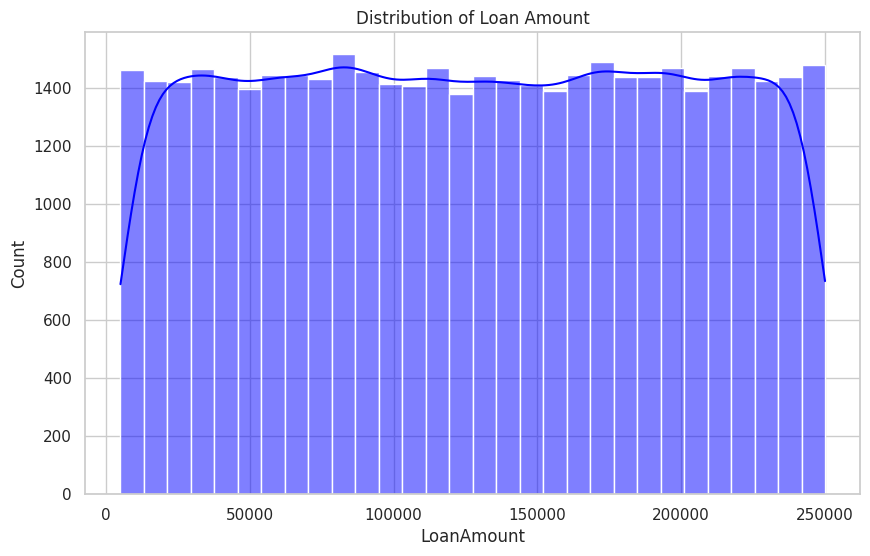

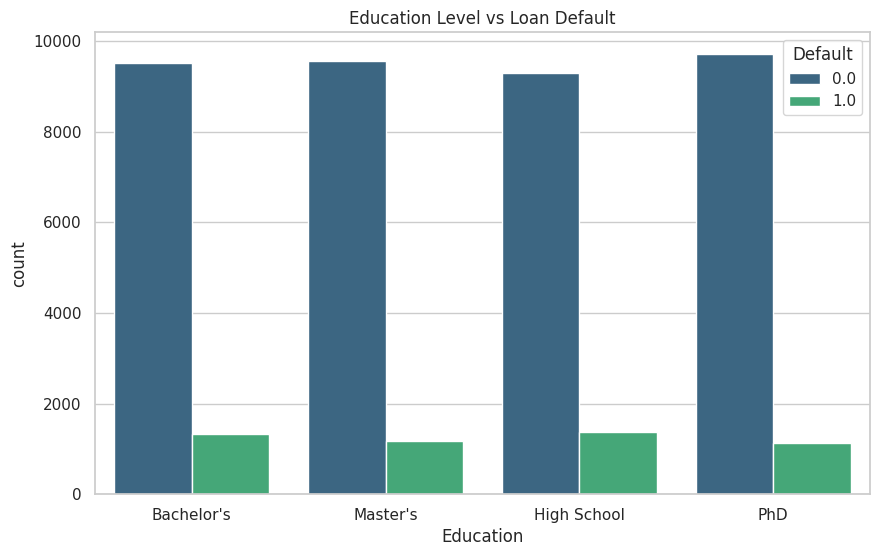

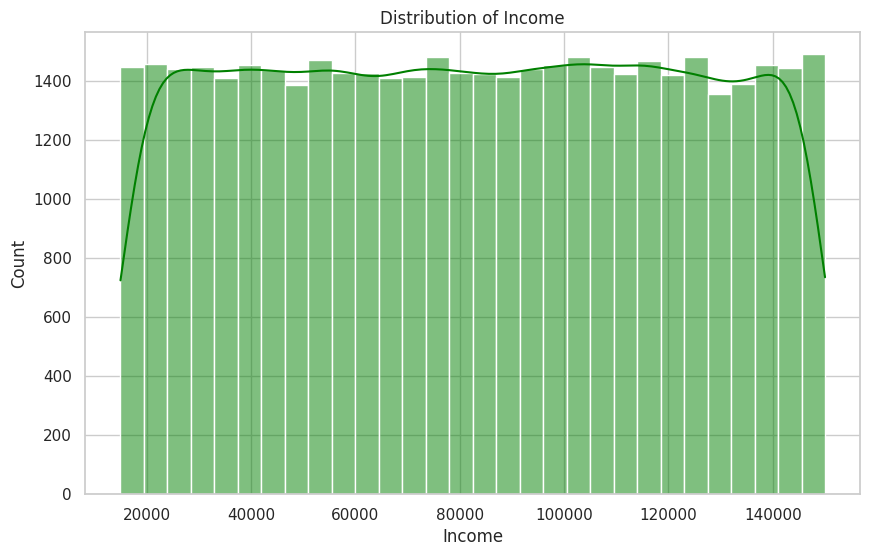

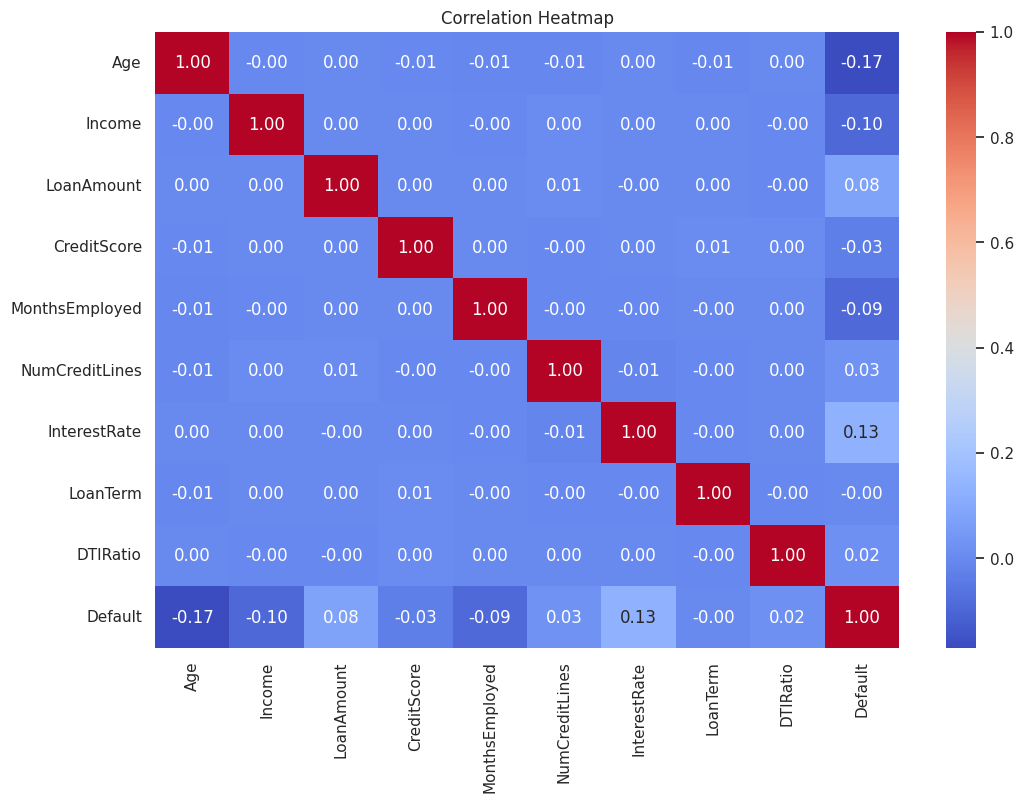

In [8]:
# 1. Loan Amount Distribution
plt.figure()
sns.histplot(df['LoanAmount'], kde=True, bins=30, color='blue')
plt.title('Distribution of Loan Amount')
plt.show()

# 2. Education Level vs Loan Default
plt.figure()
sns.countplot(x='Education', hue='Default', data=df, palette='viridis')
plt.title('Education Level vs Loan Default')
plt.show()

# 3. Income Distribution
plt.figure()
sns.histplot(df['Income'], kde=True, bins=30, color='green')
plt.title('Distribution of Income')
plt.show()

# 4. Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 5. Model Training and Testing
We will split the data into training and testing sets, scale the features, and train a Logistic Regression model.

In [9]:
# Split features and target
# Drop rows with missing values before splitting
df_model.dropna(inplace=True)
X = df_model.drop('Default', axis=1)
y = df_model['Default']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

print("Model training completed.")

Model training completed.


## 6. Evaluation Metrics
We evaluate the model using accuracy, confusion matrix, and a classification report.

Accuracy Score: 0.8857


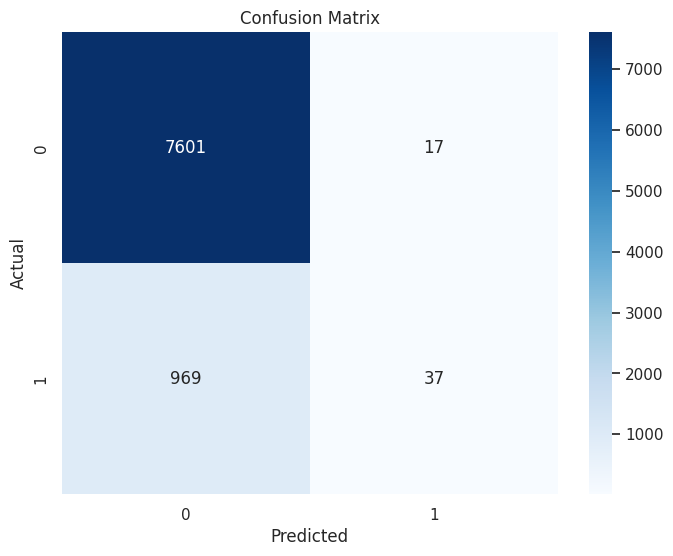


Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      7618
         1.0       0.69      0.04      0.07      1006

    accuracy                           0.89      8624
   macro avg       0.79      0.52      0.50      8624
weighted avg       0.86      0.89      0.84      8624



In [10]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

## 7. Conclusion
### Key Insights
- The dataset was well-structured with no missing values, which is rare for real-world data.
- The target variable 'Default' is imbalanced, with only about 11.6% of applicants defaulting.
- Logistic Regression achieved an overall accuracy of approximately 88.5%. However, due to the class imbalance, the model performs much better at predicting non-defaulters (class 0) than defaulters (class 1).
- Features like Interest Rate, Loan Amount, and Income show significant correlations with the default status.
- Future work could involve handling class imbalance using techniques like SMOTE or using more complex models like Random Forest or XGBoost to improve recall for the default class.